In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
cd ..

/home/jovyan/work/2018-W-450-2/11-pca-categorical


In [3]:
import lib.visuals as vs

In [4]:
IRIS = load_iris()

In [5]:
names = [(name
  .replace(" ", "")
  .replace("(cm)", "")) for name in IRIS.feature_names]

In [6]:
np.random.seed(42)

In [7]:
df_original = pd.DataFrame(IRIS.data)
df_original.columns = names
df_original['label'] = IRIS.target
df_original.label = df_original.label.astype('category')
df_original = pd.get_dummies(df_original)
df_original = df_original.sample(frac=1)

In [8]:
df_original.head()

,sepallength,sepalwidth,petallength,petalwidth,label_0,label_1,label_2
73,6.1,2.8,4.7,1.2,0,1,0
18,5.7,3.8,1.7,0.3,1,0,0
118,7.7,2.6,6.9,2.3,0,0,1
78,6.0,2.9,4.5,1.5,0,1,0
76,6.8,2.8,4.8,1.4,0,1,0


In [9]:
def apply_scale(dataframe, scaling_function):
    numerical_df = dataframe.select_dtypes(include=[float])
    print(numerical_df.columns)
    numerical_df = scaling_function(numerical_df)
    tmp_df = dataframe.copy()
    tmp_df[numerical_df.columns] = numerical_df
    return tmp_df

def gelman_scale(dataframe):
    return (dataframe - dataframe.mean())/(2*dataframe.std())

def standard_scale(dataframe):
    return (dataframe - dataframe.mean())/(dataframe.std())

df_gelman = apply_scale(df_original, gelman_scale)
df_standard = apply_scale(df_original, standard_scale)

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth'], dtype='object')
Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth'], dtype='object')


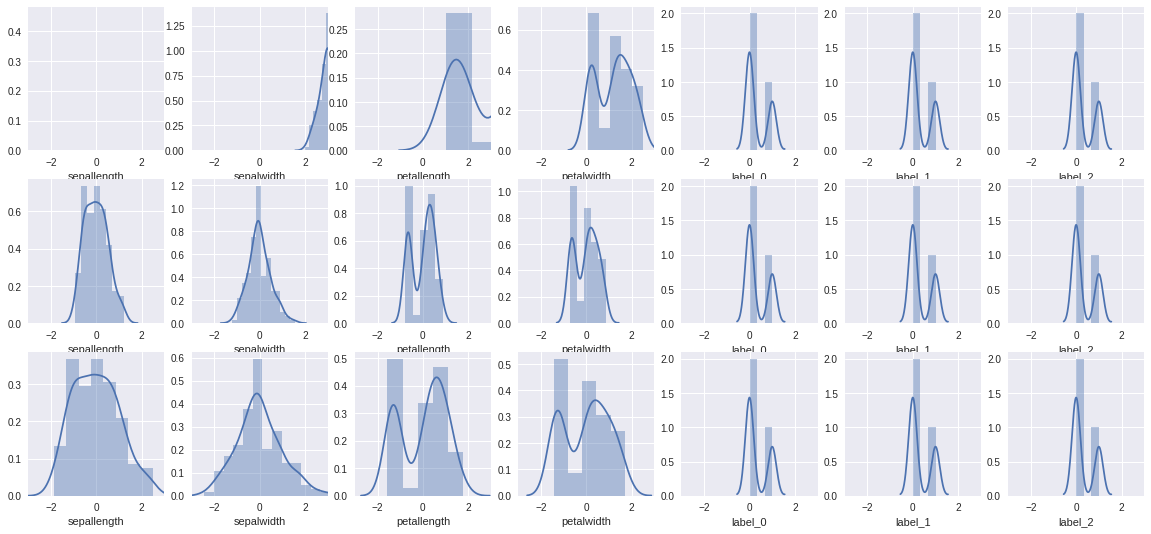

In [10]:
fig = plt.figure(figsize=(20,9))
for i, col in enumerate(df_original.columns):
    fig.add_subplot(3,7,1+i)
    sns.distplot(df_original[col])
    plt.xlim(-3,3)
    fig.add_subplot(3,7,8+i)
    sns.distplot(df_gelman[col])
    plt.xlim(-3,3)
    fig.add_subplot(3,7,15+i)
    sns.distplot(df_standard[col])
    plt.xlim(-3,3)

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca_original = PCA()
pca_gelman = PCA()
pca_standard = PCA()
pca_original.fit(df_original)
pca_gelman.fit(df_gelman)
pca_standard.fit(df_standard)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

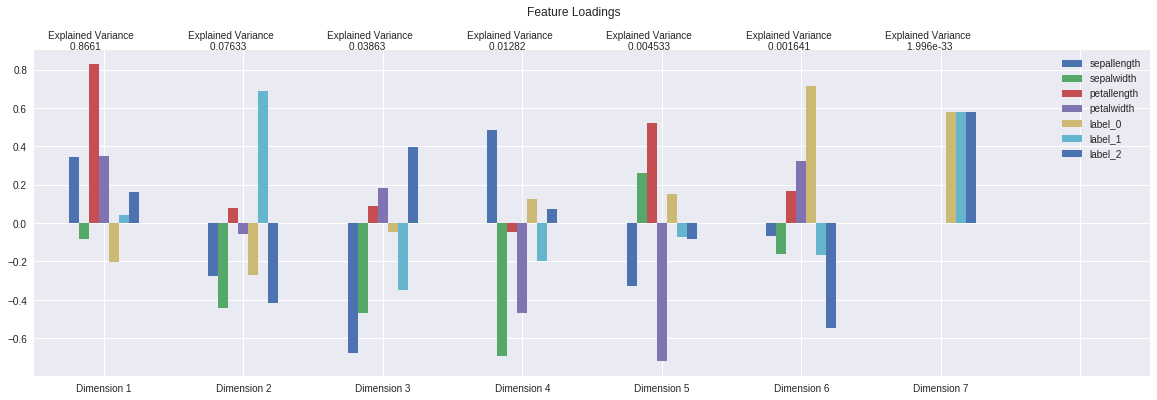

In [13]:
original_loading_plot = vs.FeatureLoadingsPlot(df_original, pca_original,7)
original_loading_plot.display_segments()

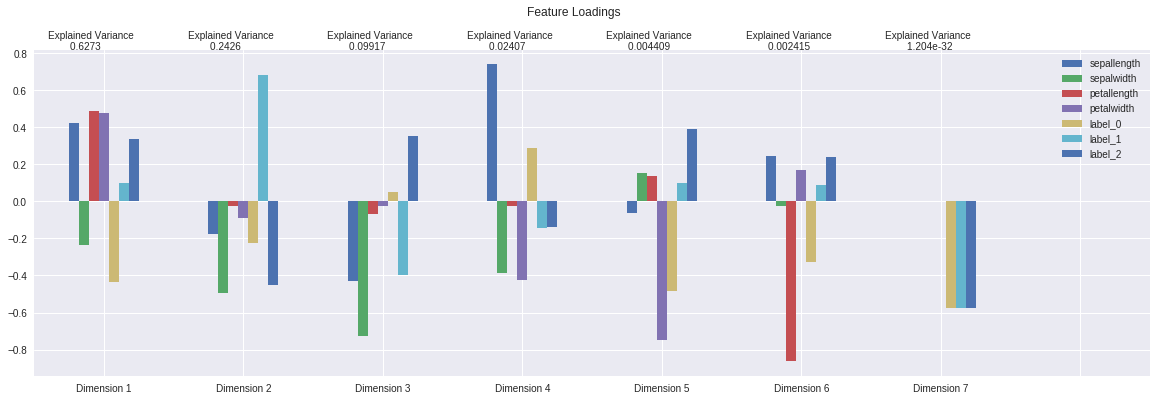

In [14]:
gelman_loading_plot = vs.FeatureLoadingsPlot(df_gelman, pca_gelman,7)
gelman_loading_plot.display_segments()

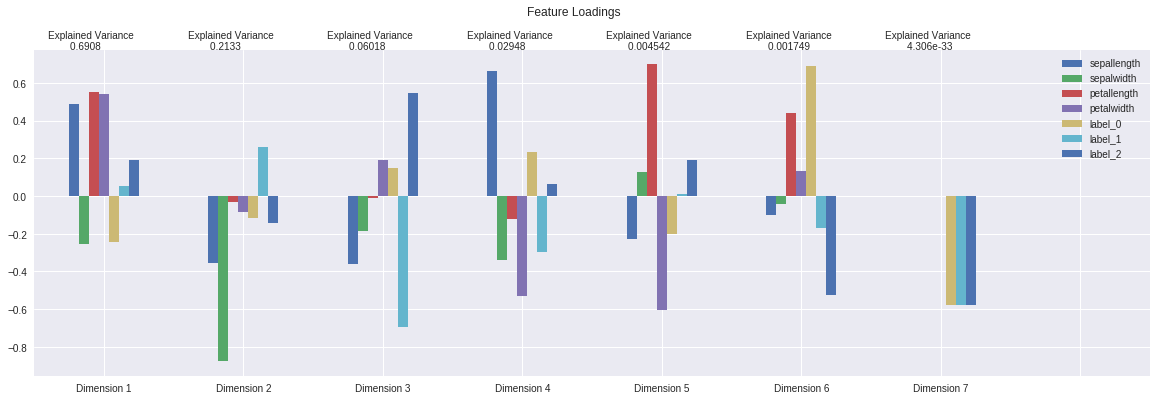

In [15]:
standard_loading_plot = vs.FeatureLoadingsPlot(df_standard, pca_standard,7)
standard_loading_plot.display_segments()

In [16]:
df_original_numerical = df_original.select_dtypes([float])
df_gelman_numerical = df_gelman.select_dtypes([float])
df_standard_numerical = df_standard.select_dtypes([float])

In [17]:
pca_original_numerical = PCA()
pca_gelman_numerical = PCA()
pca_standard_numerical = PCA()

In [18]:
pca_original_numerical.fit(df_original_numerical)
pca_gelman_numerical.fit(df_gelman_numerical)
pca_standard_numerical.fit(df_standard_numerical)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

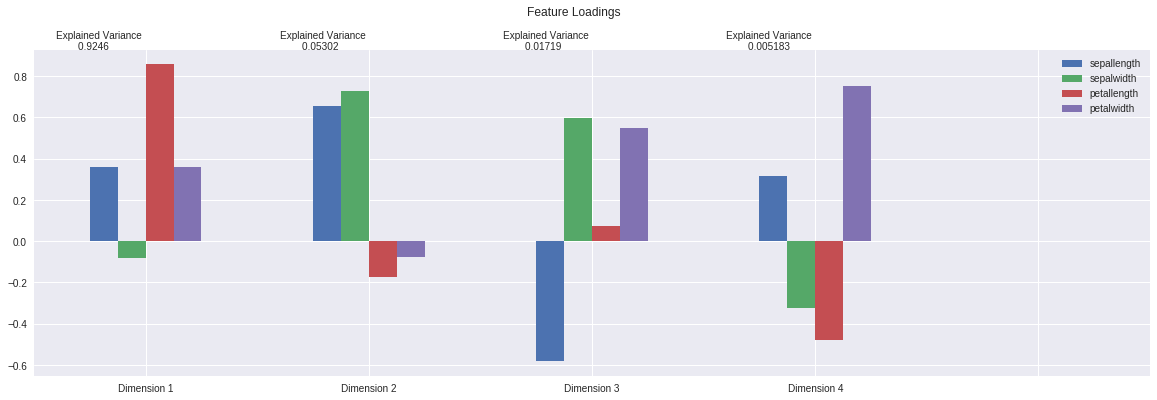

In [19]:
original_numerical_loadings = vs.FeatureLoadingsPlot(df_original_numerical, pca_original_numerical,4)
original_numerical_loadings.display_segments()

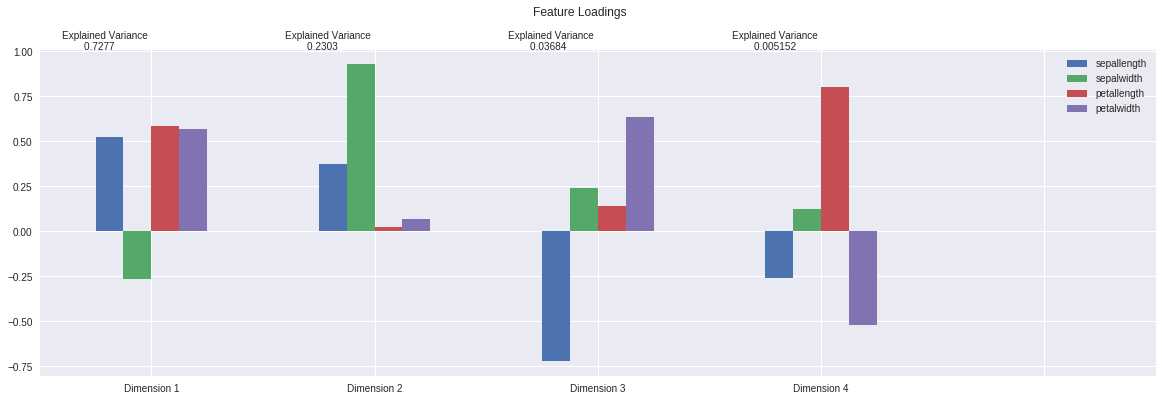

In [20]:
gelman_numerical_loadings = vs.FeatureLoadingsPlot(df_gelman_numerical, pca_gelman_numerical,4)
gelman_numerical_loadings.display_segments()

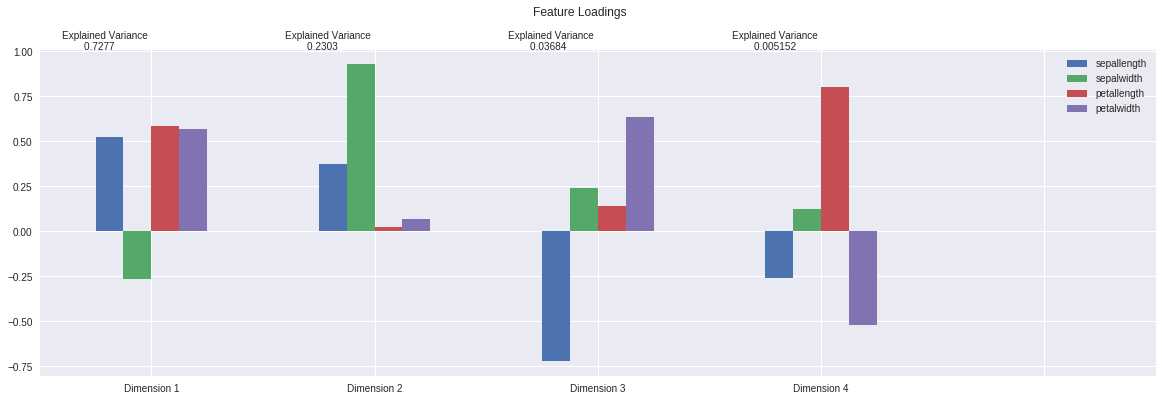

In [21]:
standard_numerical_loadings = vs.FeatureLoadingsPlot(df_standard_numerical, pca_standard_numerical,4)
standard_numerical_loadings.display_segments()

In [22]:
whos DataFrame

Variable                Type         Data/Info
----------------------------------------------
df_gelman               DataFrame         sepallength  sepalwi<...>n\n[150 rows x 7 columns]
df_gelman_numerical     DataFrame         sepallength  sepalwi<...>n\n[150 rows x 4 columns]
df_original             DataFrame         sepallength  sepalwi<...>n\n[150 rows x 7 columns]
df_original_numerical   DataFrame         sepallength  sepalwi<...>n\n[150 rows x 4 columns]
df_standard             DataFrame         sepallength  sepalwi<...>n\n[150 rows x 7 columns]
df_standard_numerical   DataFrame         sepallength  sepalwi<...>n\n[150 rows x 4 columns]


In [23]:
whos PCA

Variable                 Type    Data/Info
------------------------------------------
pca_gelman               PCA     PCA(copy=True, iterated_p<...>', tol=0.0, whiten=False)
pca_gelman_numerical     PCA     PCA(copy=True, iterated_p<...>', tol=0.0, whiten=False)
pca_original             PCA     PCA(copy=True, iterated_p<...>', tol=0.0, whiten=False)
pca_original_numerical   PCA     PCA(copy=True, iterated_p<...>', tol=0.0, whiten=False)
pca_standard             PCA     PCA(copy=True, iterated_p<...>', tol=0.0, whiten=False)
pca_standard_numerical   PCA     PCA(copy=True, iterated_p<...>', tol=0.0, whiten=False)


In [31]:
dims_4 = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4']
dims_7 = dims_4 + ['Dimension 5', 'Dimension 6', 'Dimension 7']
df_original_pca = pd.DataFrame(pca_original.transform(df_original))
df_original_pca.columns = dims_7
df_original_numerical_pca = pd.DataFrame(pca_original_numerical.transform(df_original_numerical))
df_original_numerical_pca.columns = dims_4
df_gelman_pca = pd.DataFrame(pca_gelman.transform(df_gelman))
df_gelman_pca.columns = dims_7
df_gelman_numerical_pca = pd.DataFrame(pca_gelman_numerical.transform(df_gelman_numerical))
df_gelman_numerical_pca.columns = dims_4
df_standard_pca = pd.DataFrame(pca_standard.transform(df_standard))
df_standard_pca.columns = dims_7
df_standard_numerical_pca = pd.DataFrame(pca_standard_numerical.transform(df_standard_numerical))
df_standard_numerical_pca.columns = dims_4

In [32]:
whos DataFrame

Variable                    Type         Data/Info
--------------------------------------------------
df_gelman                   DataFrame         sepallength  sepalwi<...>n\n[150 rows x 7 columns]
df_gelman_numerical         DataFrame         sepallength  sepalwi<...>n\n[150 rows x 4 columns]
df_gelman_numerical_pca     DataFrame         Dimension 1  Dimensi<...>n\n[150 rows x 4 columns]
df_gelman_pca               DataFrame         Dimension 1  Dimensi<...>n\n[150 rows x 7 columns]
df_original                 DataFrame         sepallength  sepalwi<...>n\n[150 rows x 7 columns]
df_original_numerical       DataFrame         sepallength  sepalwi<...>n\n[150 rows x 4 columns]
df_original_numerical_pca   DataFrame         Dimension 1  Dimensi<...>n\n[150 rows x 4 columns]
df_original_pca             DataFrame         Dimension 1  Dimensi<...>n\n[150 rows x 7 columns]
df_standard                 DataFrame         sepallength  sepalwi<...>n\n[150 rows x 7 columns]
df_standard_numerical    

100%|██████████| 3/3 [00:00<00:00, 60.48it/s]


For n_clusters = 2 the silhouette score is 0.55979669576841.
For n_clusters = 3 the silhouette score is 0.6441300353909708.
For n_clusters = 4 the silhouette score is 0.5618038380617786.


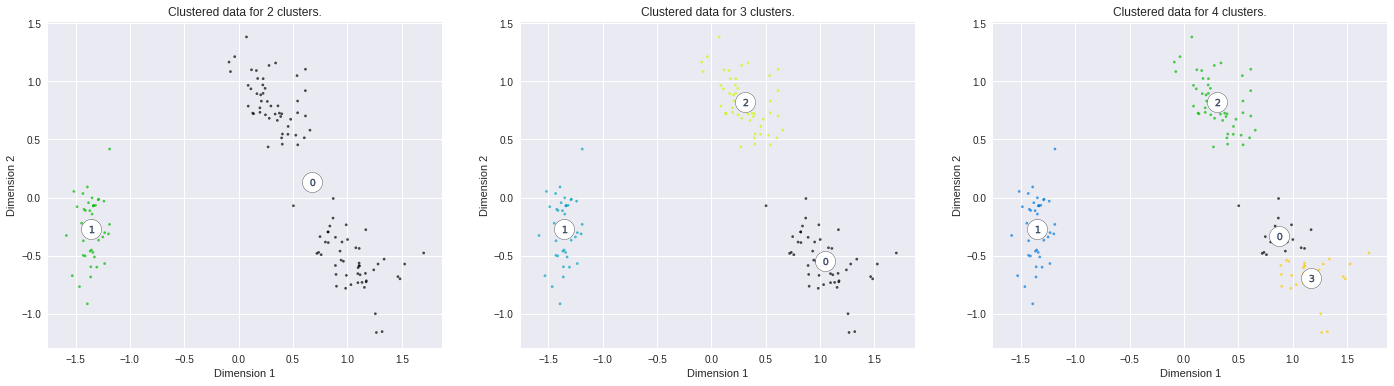

In [33]:
gelman_pca_clusters = vs.Clusters(df_gelman_pca, [2,3,4])
gelman_pca_clusters.cluster_plots()

100%|██████████| 3/3 [00:00<00:00, 53.00it/s]


For n_clusters = 2 the silhouette score is 0.5668532751655938.
For n_clusters = 3 the silhouette score is 0.5074279060372141.
For n_clusters = 4 the silhouette score is 0.46174050153521173.


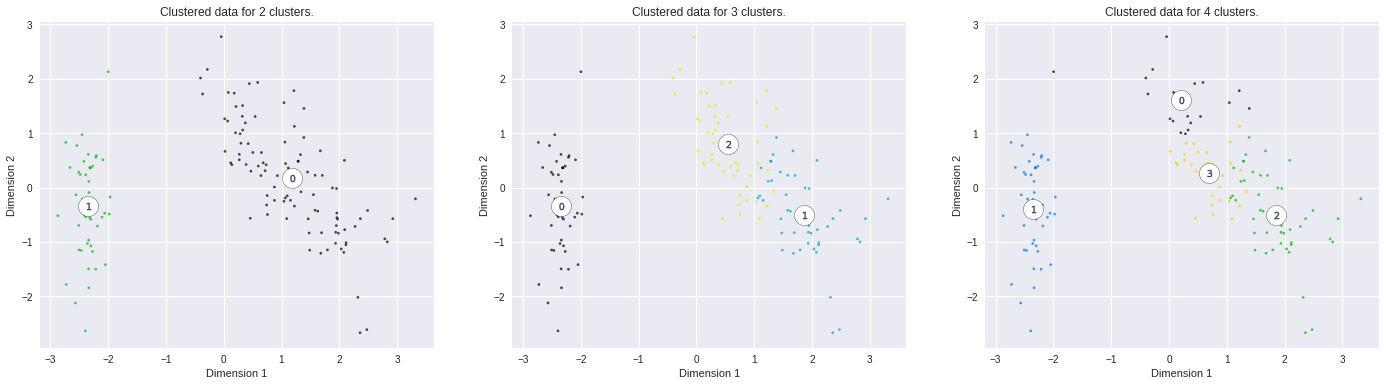

In [34]:
standard_pca_clusters = vs.Clusters(df_standard_pca, [2,3,4])
standard_pca_clusters.cluster_plots()

100%|██████████| 3/3 [00:00<00:00, 56.76it/s]


For n_clusters = 2 the silhouette score is 0.6617186146112488.
For n_clusters = 3 the silhouette score is 0.6223270152269426.
For n_clusters = 4 the silhouette score is 0.5785014239229879.


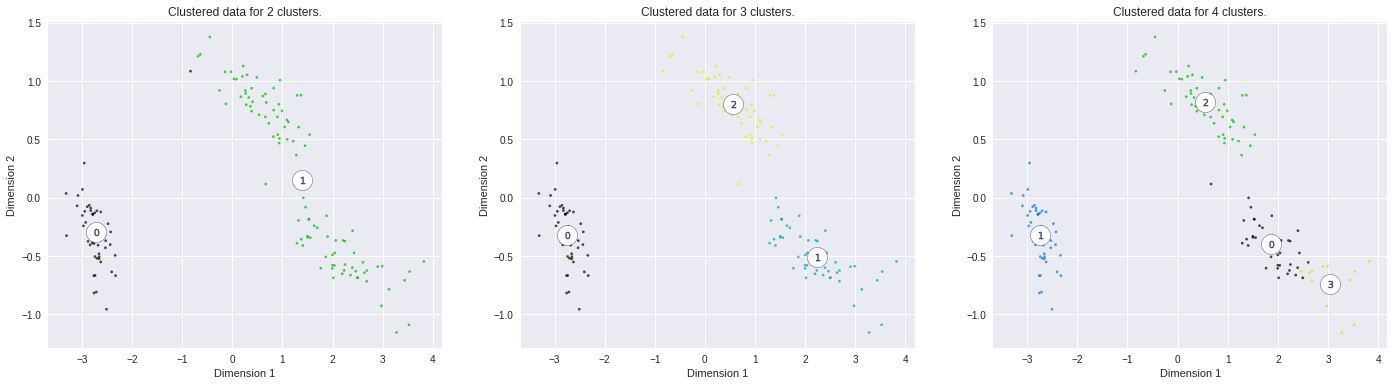

In [36]:
original_pca_clusters = vs.Clusters(df_original_pca, [2,3,4])
original_pca_clusters.cluster_plots()

100%|██████████| 3/3 [00:00<00:00, 44.31it/s]


For n_clusters = 2 the silhouette score is 0.580184463257396.
For n_clusters = 3 the silhouette score is 0.45897178670187183.
For n_clusters = 4 the silhouette score is 0.38876391684714956.


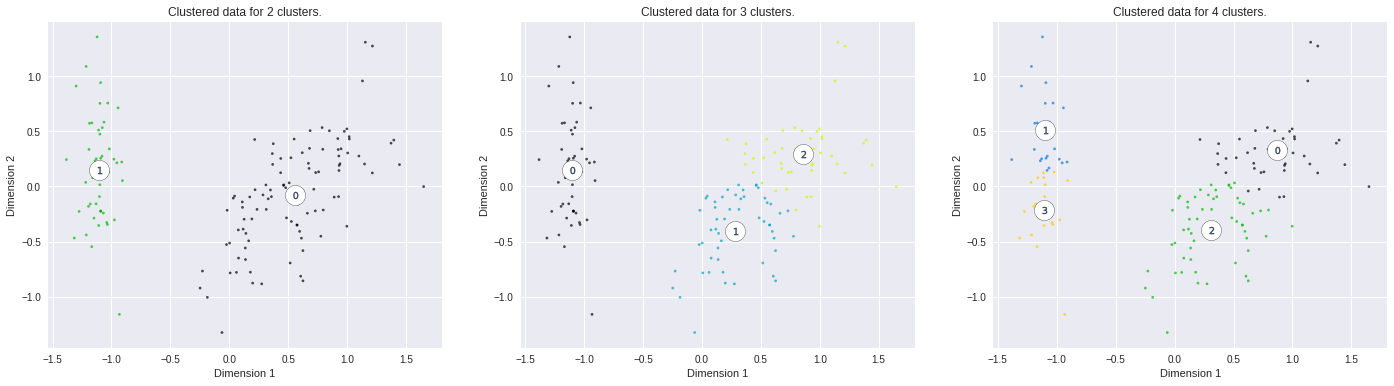

In [37]:
gelman_numerical_pca_clusters = vs.Clusters(df_gelman_numerical_pca, [2,3,4])
gelman_numerical_pca_clusters.cluster_plots()

100%|██████████| 3/3 [00:00<00:00, 48.76it/s]


For n_clusters = 2 the silhouette score is 0.580184463257396.
For n_clusters = 3 the silhouette score is 0.46214947389312017.
For n_clusters = 4 the silhouette score is 0.38686030299599405.


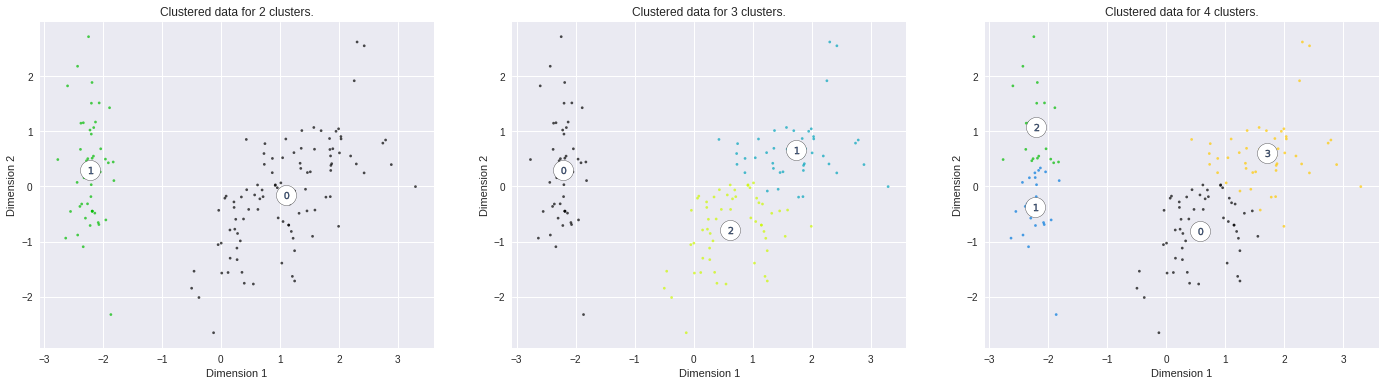

In [38]:
standard_numerical_pca_clusters = vs.Clusters(df_standard_numerical_pca, [2,3,4])
standard_numerical_pca_clusters.cluster_plots()

100%|██████████| 3/3 [00:00<00:00, 46.25it/s]


For n_clusters = 2 the silhouette score is 0.6808136202936815.
For n_clusters = 3 the silhouette score is 0.5525919445499755.
For n_clusters = 4 the silhouette score is 0.49782569010954697.


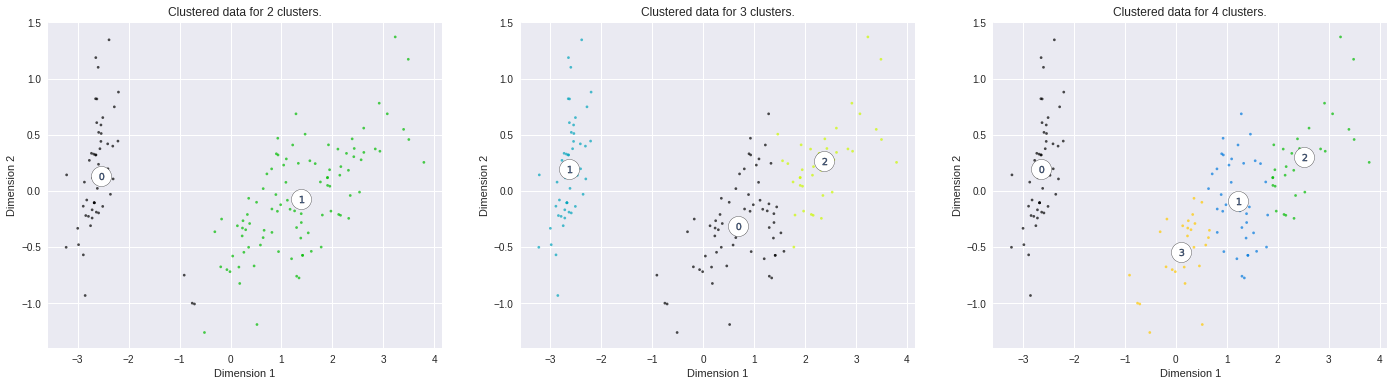

In [40]:
original_numerical_pca_clusters = vs.Clusters(df_original_numerical_pca, [2,3,4])
original_numerical_pca_clusters.cluster_plots()